In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Airline_Delay_Cause.csv")
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [4]:
for columns in df.columns:
    print(columns)

year
month
carrier
carrier_name
airport
airport_name
arr_flights
arr_del15
carrier_ct
weather_ct
nas_ct
security_ct
late_aircraft_ct
arr_cancelled
arr_diverted
arr_delay
carrier_delay
weather_delay
nas_delay
security_delay
late_aircraft_delay


In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
definations=pd.read_excel("Download_Column_Definitions.xlsx")
definations.head()

,Column Name,Column Definition
0,year,YYYY format
1,month,MM format (1-12)
2,carrier,Code assigned by assigned by US DOT to identify a unique airline carrier.
3,carrier_name,"Unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation."
4,airport,A three character alpha-numeric code issued by the U.S. Department of Transportation which is the official designation of the airport.


In [7]:
definations.head(21)

,Column Name,Column Definition
0,year,YYYY format
1,month,MM format (1-12)
2,carrier,Code assigned by assigned by US DOT to identify a unique airline carrier.
3,carrier_name,"Unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation."
4,airport,A three character alpha-numeric code issued by the U.S. Department of Transportation which is the official designation of the airport.
5,airport_name,a place from which aircraft operate that usually has paved runways and maintenance facilities and often serves as a terminal
6,arr_flights,Arrival Flights
7,arr_del15,"Arrival Delay Indicator, 15 Minutes or More Arrival delay equals the difference of the actual arrival time minus the scheduled arrival time. A flight is considered on-time when it arrives less than 15 minutes after its published arrival time."
8,carrier_ct,Carrier Count for airline cause of delay
9,weather_ct,Weather Count for airline cause of delay


In [8]:
df.shape

(179338, 21)

In [9]:
df.isnull().any()

year                   False
month                  False
carrier                False
carrier_name           False
airport                False
airport_name           False
arr_flights             True
arr_del15               True
carrier_ct              True
weather_ct              True
nas_ct                  True
security_ct             True
late_aircraft_ct        True
arr_cancelled           True
arr_diverted            True
arr_delay               True
carrier_delay           True
weather_delay           True
nas_delay               True
security_delay          True
late_aircraft_delay     True
dtype: bool

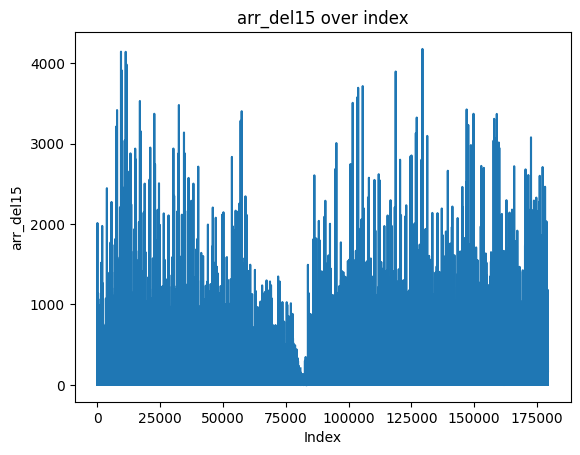

In [10]:
import matplotlib.pyplot as plt

Y = df['arr_del15']
x = range(len(Y))  

plt.plot(x, Y)
plt.xlabel("Index")
plt.ylabel("arr_del15")
plt.title("arr_del15 over index")
plt.show()


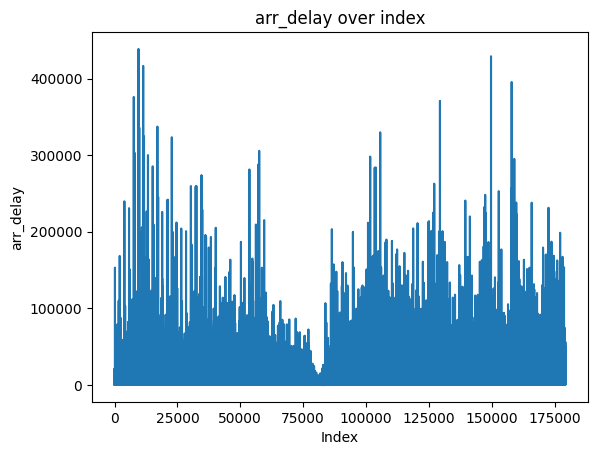

In [11]:
import matplotlib.pyplot as plt

Y = df['arr_delay']
x = range(len(Y))  

plt.plot(x, Y)
plt.xlabel("Index")
plt.ylabel("arr_delay")
plt.title("arr_delay over index")
plt.show()


In [12]:
from sklearn.cluster import KMeans
k = 10
kmeans_cluster = KMeans(init = "k-means++",
                        n_clusters = k,
                        n_init = 10,
                        random_state = 0)

In [13]:
X = df[['arr_del15']].dropna()
index = X.index
kmeans_cluster.fit(X)

,n_clusters,10
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


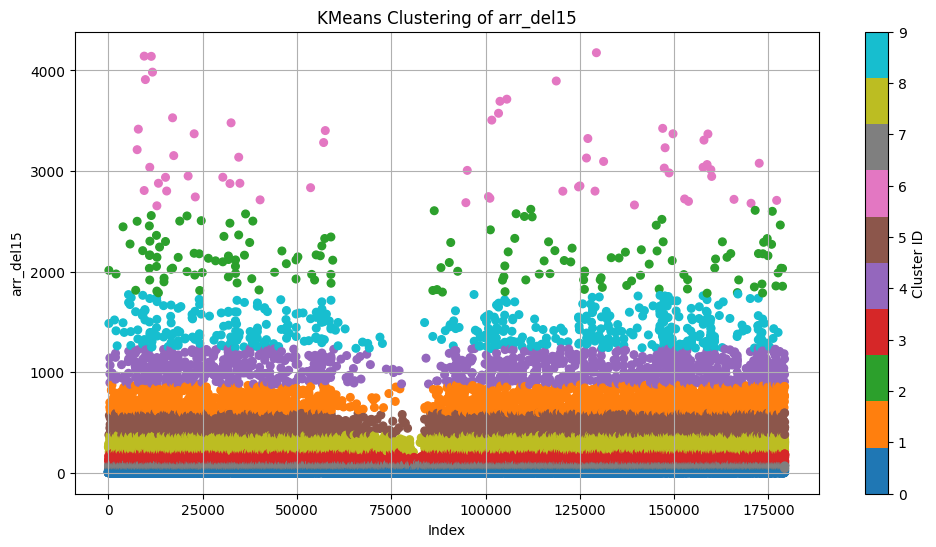

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(index, X['arr_del15'], c=kmeans_cluster.labels_, cmap='tab10', s=30)
plt.title("KMeans Clustering of arr_del15")
plt.xlabel("Index")
plt.ylabel("arr_del15")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()

In [15]:
unique, counts = np.unique(kmeans_cluster.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Cluster Sizes:", cluster_counts)

Cluster Sizes: {np.int32(0): np.int64(127628), np.int32(1): np.int64(1659), np.int32(2): np.int64(147), np.int32(3): np.int64(10631), np.int32(4): np.int64(958), np.int32(5): np.int64(2753), np.int32(6): np.int64(61), np.int32(7): np.int64(29514), np.int32(8): np.int64(4955), np.int32(9): np.int64(441)}


In [16]:
df['arr_del15'].isna().sum()
# might as well drop this 

np.int64(591)

In [17]:
df['carrier_ct'].isna().sum()

np.int64(341)

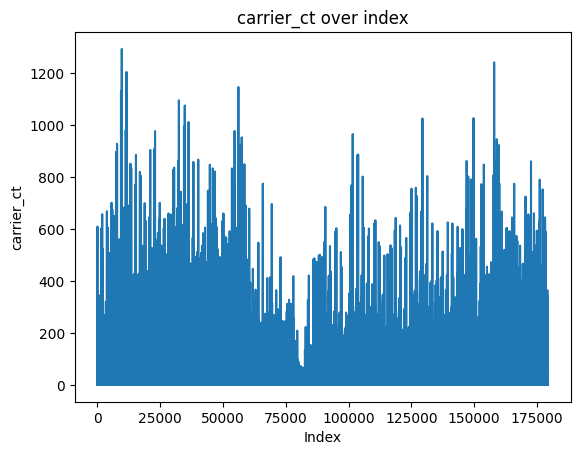

In [18]:
import matplotlib.pyplot as plt

Y = df['carrier_ct']
x = range(len(Y))  

plt.plot(x, Y)
plt.xlabel("Index")
plt.ylabel("carrier_ct")
plt.title("carrier_ct over index")
plt.show()


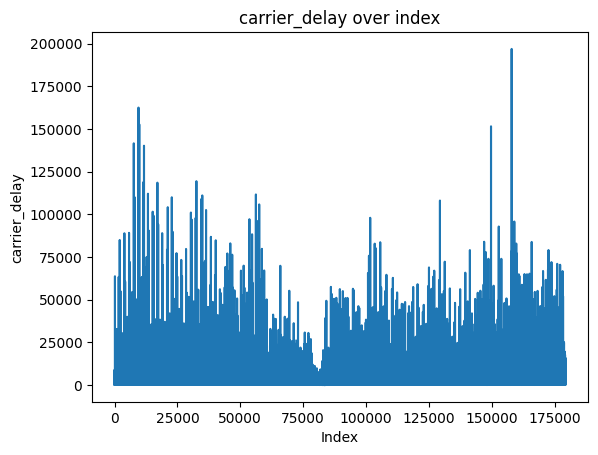

In [19]:
import matplotlib.pyplot as plt

Y = df['carrier_delay']
x = range(len(Y))  

plt.plot(x, Y)
plt.xlabel("Index")
plt.ylabel("carrier_delay")
plt.title("carrier_delay over index")
plt.show()


In [20]:
df['carrier_ct']

0          2.46
1          4.25
2          5.94
3          0.56
4         76.88
          ...  
179333    59.21
179334    18.00
179335    25.17
179336    64.00
179337    45.62
Name: carrier_ct, Length: 179338, dtype: float64

In [21]:
df['late_aircraft_ct']

0           0.81
1           1.75
2           3.00
3           1.44
4         117.94
           ...  
179333     98.79
179334     17.80
179335     27.83
179336     86.60
179337     65.67
Name: late_aircraft_ct, Length: 179338, dtype: float64

In [22]:
df['carrier_name'].dtype

dtype('O')

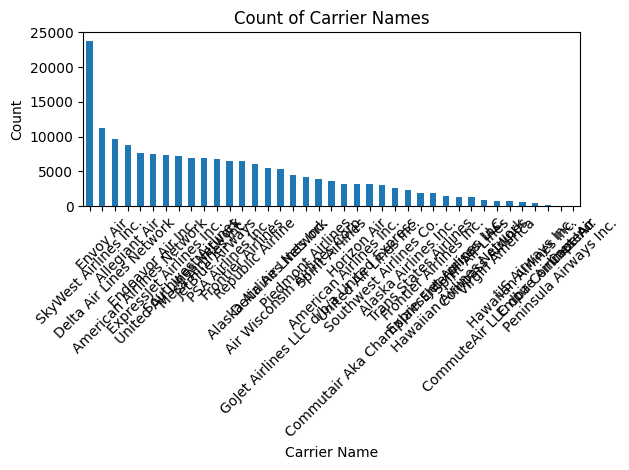

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

carrier_counts = df['carrier_name'].value_counts()

carrier_counts.plot(kind='bar')
plt.xlabel("Carrier Name")
plt.ylabel("Count")
plt.title("Count of Carrier Names")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
carrier_counts.shape

(39,)

In [25]:
carrier_counts

carrier_name
SkyWest Airlines Inc.                        23821
Envoy Air                                    11299
Delta Air Lines Network                       9677
Allegiant Air                                 8761
American Airlines Network                     7654
Endeavor Air Inc.                             7494
ExpressJet Airlines Inc.                      7348
United Air Lines Network                      7271
Southwest Airlines                            6941
Mesa Airlines Inc.                            6877
JetBlue Airways                               6827
PSA Airlines Inc.                             6545
Frontier Airlines                             6438
Republic Airline                              6072
Alaska Airlines Network                       5433
Delta Air Lines Inc.                          5303
Air Wisconsin Airlines Corp                   4468
Piedmont Airlines                             4160
GoJet Airlines LLC d/b/a United Express       3948
Spirit Airlines   

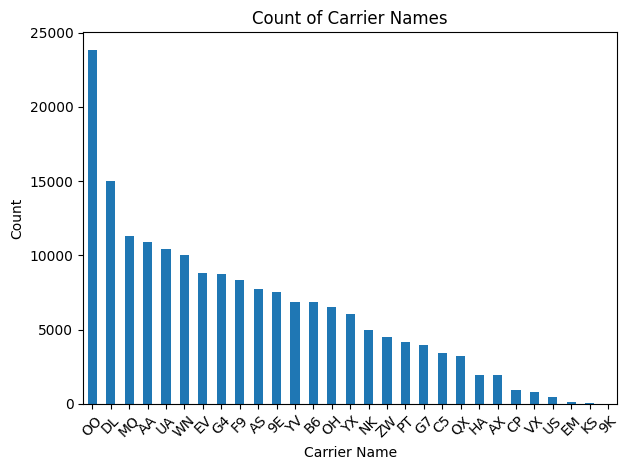

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

carrier_counts = df['carrier'].value_counts()

carrier_counts.plot(kind='bar')
plt.xlabel("Carrier Name")
plt.ylabel("Count")
plt.title("Count of Carrier Names")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

So multiple airlines can come under a single carrier certificate. Not of much use as we can cleearly see utilising the airlane tag is just far more useful

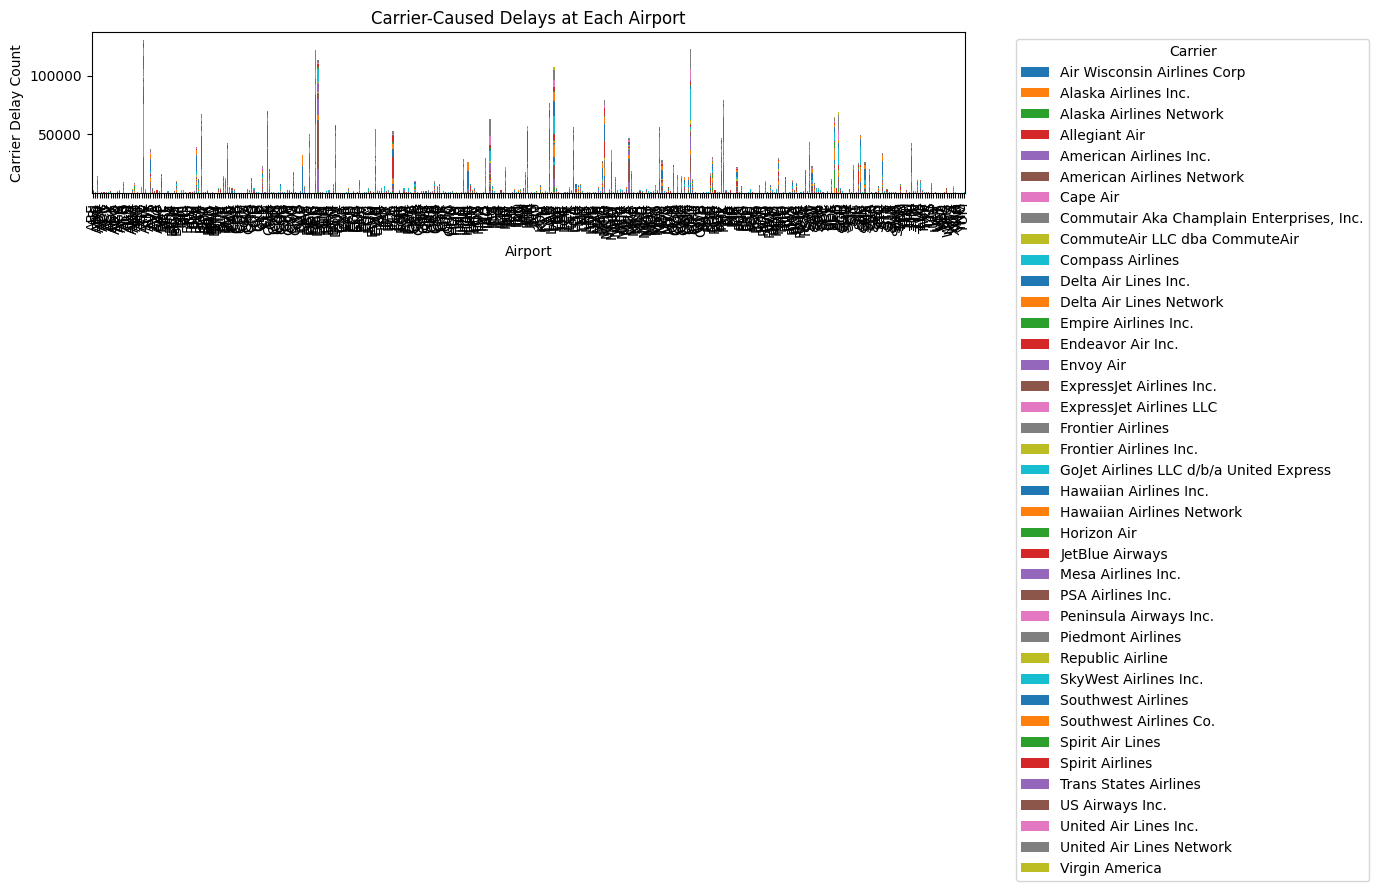

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


grouped = df.groupby(['carrier_name', 'airport'])['carrier_ct'].sum().reset_index()
pivot_table = grouped.pivot(index='airport', columns='carrier_name', values='carrier_ct').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.xlabel("Airport")
plt.ylabel("Carrier Delay Count")
plt.title("Carrier-Caused Delays at Each Airport")
plt.legend(title="Carrier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
df['carrier_ct'].max()

np.float64(1293.91)

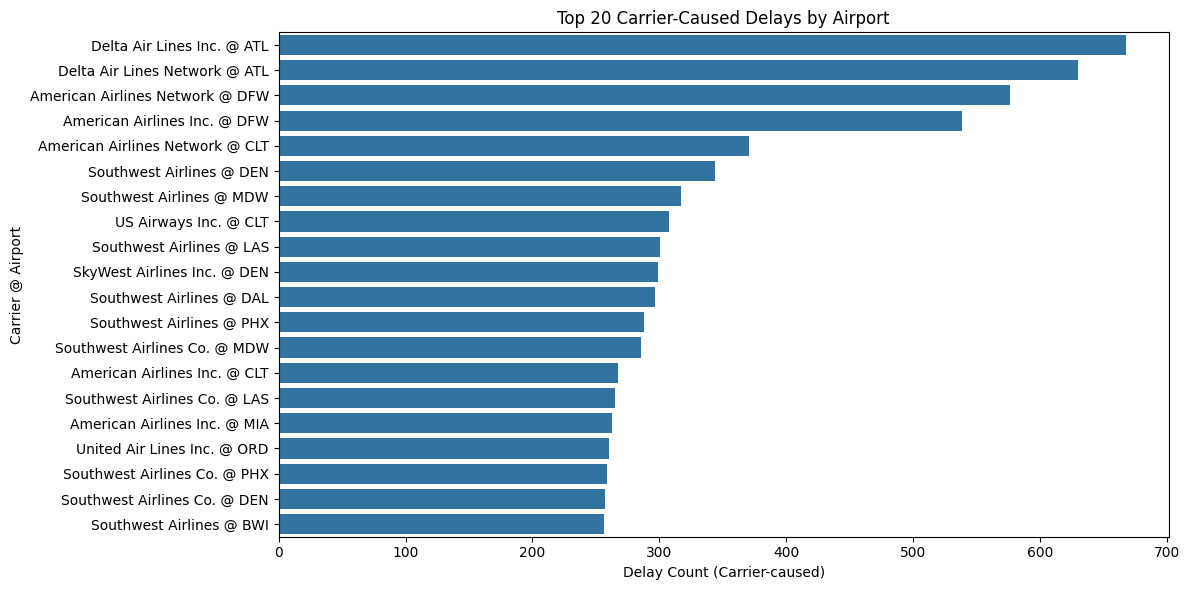

In [29]:
grouped = df.groupby(['carrier_name', 'airport'])['carrier_ct'].mean().reset_index()

top_delays = grouped.sort_values(by='carrier_ct', ascending=False).head(20)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_delays, x='carrier_ct', y=top_delays['carrier_name'] + " @ " + top_delays['airport'])
plt.xlabel("Delay Count (Carrier-caused)")
plt.ylabel("Carrier @ Airport")
plt.title("Top 20 Carrier-Caused Delays by Airport")
plt.tight_layout()
plt.show()

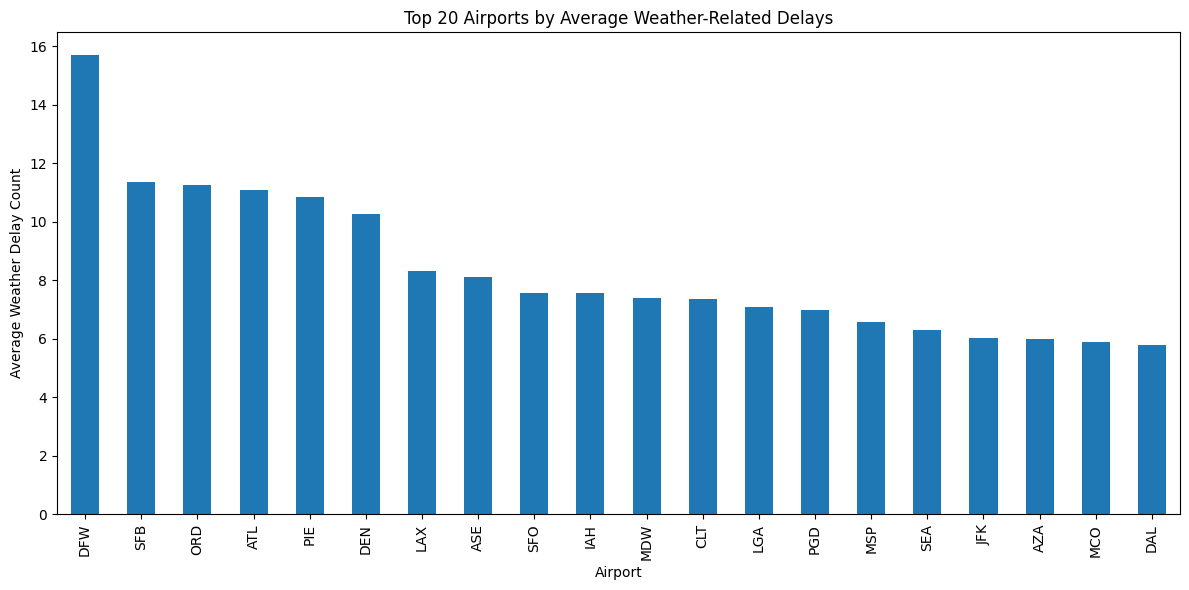

In [30]:

airport_avg_weather_delay = df.groupby('airport')['weather_ct'].mean()

top_delays = airport_avg_weather_delay.sort_values(ascending=False).head(20)

# import seaborn as sns
# import matplotlib.pyplot as plt

top_delays.plot(kind='bar', figsize=(12, 6))
plt.xlabel("Airport")
plt.ylabel("Average Weather Delay Count")
plt.title("Top 20 Airports by Average Weather-Related Delays")
plt.tight_layout()
plt.show()

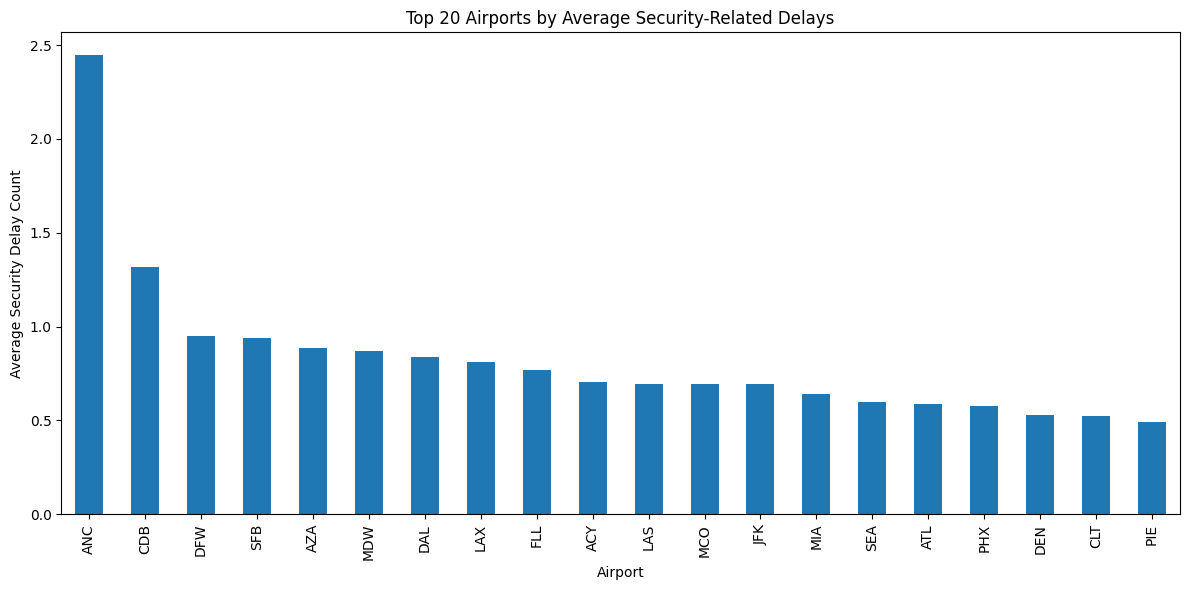

In [31]:
airport_avg_security_delay = df.groupby('airport')['security_ct'].mean()

top_delays = airport_avg_security_delay.sort_values(ascending=False).head(20)

# import seaborn as sns
# import matplotlib.pyplot as plt

top_delays.plot(kind='bar', figsize=(12, 6))
plt.xlabel("Airport")
plt.ylabel("Average Security Delay Count")
plt.title("Top 20 Airports by Average Security-Related Delays")
plt.tight_layout()
plt.show()

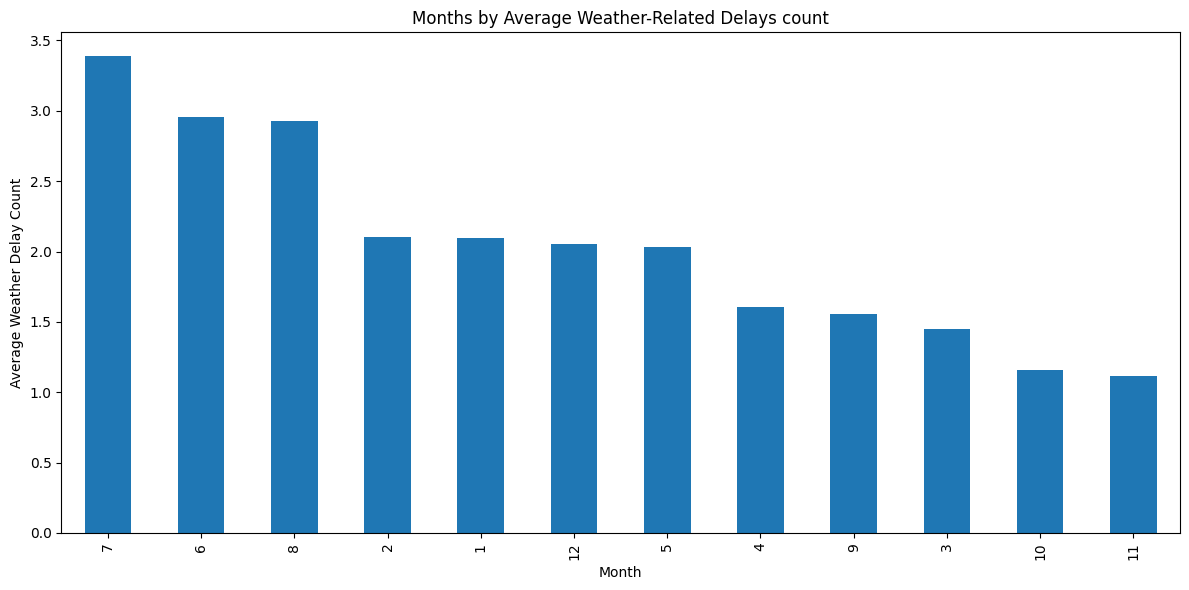

In [32]:

airport_avg_weather_delay = df.groupby('month')['weather_ct'].mean()

top_delays = airport_avg_weather_delay.sort_values(ascending=False).head(20)

# import seaborn as sns
# import matplotlib.pyplot as plt

top_delays.plot(kind='bar', figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Average Weather Delay Count")
plt.title("Months by Average Weather-Related Delays count")
plt.tight_layout()
plt.show()

In [33]:
df=df.dropna()
# very less values of NaNs so better to be dropped

In [34]:
df.isnull().any()

year                   False
month                  False
carrier                False
carrier_name           False
airport                False
airport_name           False
arr_flights            False
arr_del15              False
carrier_ct             False
weather_ct             False
nas_ct                 False
security_ct            False
late_aircraft_ct       False
arr_cancelled          False
arr_diverted           False
arr_delay              False
carrier_delay          False
weather_delay          False
nas_delay              False
security_delay         False
late_aircraft_delay    False
dtype: bool

Adding the features

In [35]:
delay_score = df.groupby(['carrier_name', 'airport'])['carrier_ct'].mean().reset_index()
delay_score.columns = ['carrier_name', 'airport', 'carrier_airport_delay_score']
df = df.merge(delay_score, on=['carrier_name', 'airport'], how='left')
df.head(20)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_airport_delay_score
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",72.0,5.0,2.46,1.00,...,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0,3.471525
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0,4.234478
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0,5.651831
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0,3.418548
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta International",2111.0,256.0,76.88,8.75,...,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0,85.885000
5,2023,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,7.0,3.00,1.00,...,1.79,0.0,2.0,325.0,168.0,28.0,46.0,0.0,83.0,3.735000
6,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.00,...,0.85,0.0,0.0,910.0,547.0,0.0,286.0,0.0,77.0,2.453654
7,2023,12,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",82.0,12.0,4.96,0.00,...,4.15,1.0,0.0,684.0,292.0,0.0,152.0,0.0,240.0,3.711594
8,2023,12,9E,Endeavor Air Inc.,AZO,"Kalamazoo, MI: Kalamazoo/Battle Creek International",33.0,2.0,1.00,1.00,...,0.00,0.0,0.0,852.0,36.0,816.0,0.0,0.0,0.0,3.097660
9,2023,12,9E,Endeavor Air Inc.,BDL,"Hartford, CT: Bradley International",35.0,6.0,1.76,0.00,...,3.95,0.0,0.0,1216.0,961.0,0.0,77.0,0.0,178.0,2.963226


In [36]:
delay_score = df.groupby('month')['weather_ct'].mean().reset_index()
delay_score.columns = ['month', 'weather_month']
df = df.merge(delay_score, on='month', how='left')
df.head(20)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_airport_delay_score,weather_month
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",72.0,5.0,2.46,1.00,...,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0,3.471525,2.054276
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0,4.234478,2.054276
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0,5.651831,2.054276
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0,3.418548,2.054276
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta International",2111.0,256.0,76.88,8.75,...,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0,85.885000,2.054276
5,2023,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,7.0,3.00,1.00,...,0.0,2.0,325.0,168.0,28.0,46.0,0.0,83.0,3.735000,2.054276
6,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.00,...,0.0,0.0,910.0,547.0,0.0,286.0,0.0,77.0,2.453654,2.054276
7,2023,12,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",82.0,12.0,4.96,0.00,...,1.0,0.0,684.0,292.0,0.0,152.0,0.0,240.0,3.711594,2.054276
8,2023,12,9E,Endeavor Air Inc.,AZO,"Kalamazoo, MI: Kalamazoo/Battle Creek International",33.0,2.0,1.00,1.00,...,0.0,0.0,852.0,36.0,816.0,0.0,0.0,0.0,3.097660,2.054276
9,2023,12,9E,Endeavor Air Inc.,BDL,"Hartford, CT: Bradley International",35.0,6.0,1.76,0.00,...,0.0,0.0,1216.0,961.0,0.0,77.0,0.0,178.0,2.963226,2.054276


In [37]:
delay_score = df.groupby('airport')['security_ct'].mean().reset_index()
delay_score.columns = ['airport', 'security_ct']
df = df.merge(delay_score, on='airport', how='left')
df.head(20)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_airport_delay_score,weather_month,security_ct_y
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",72.0,5.0,2.46,1.00,...,0.0,672.0,61.0,574.0,20.0,0.0,17.0,3.471525,2.054276,0.019714
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,348.0,252.0,0.0,33.0,0.0,63.0,4.234478,2.054276,0.024818
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,859.0,536.0,0.0,47.0,0.0,276.0,5.651831,2.054276,0.029553
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,75.0,9.0,0.0,0.0,0.0,66.0,3.418548,2.054276,0.044720
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta International",2111.0,256.0,76.88,8.75,...,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0,85.885000,2.054276,0.589745
5,2023,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,7.0,3.00,1.00,...,2.0,325.0,168.0,28.0,46.0,0.0,83.0,3.735000,2.054276,0.016988
6,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.00,...,0.0,910.0,547.0,0.0,286.0,0.0,77.0,2.453654,2.054276,0.185195
7,2023,12,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",82.0,12.0,4.96,0.00,...,0.0,684.0,292.0,0.0,152.0,0.0,240.0,3.711594,2.054276,0.035905
8,2023,12,9E,Endeavor Air Inc.,AZO,"Kalamazoo, MI: Kalamazoo/Battle Creek International",33.0,2.0,1.00,1.00,...,0.0,852.0,36.0,816.0,0.0,0.0,0.0,3.097660,2.054276,0.004012
9,2023,12,9E,Endeavor Air Inc.,BDL,"Hartford, CT: Bradley International",35.0,6.0,1.76,0.00,...,0.0,1216.0,961.0,0.0,77.0,0.0,178.0,2.963226,2.054276,0.091192


In [38]:
from sklearn.preprocessing import LabelEncoder

le_carrier = LabelEncoder()
le_airport = LabelEncoder()

df['carrier_label'] = le_carrier.fit_transform(df['carrier_name'])
df['airport_label'] = le_airport.fit_transform(df['airport'])
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_airport_delay_score,weather_month,security_ct_y,carrier_label,airport_label
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",72.0,5.0,2.46,1.00,...,61.0,574.0,20.0,0.0,17.0,3.471525,2.054276,0.019714,13,0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,252.0,0.0,33.0,0.0,63.0,4.234478,2.054276,0.024818,13,11
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,536.0,0.0,47.0,0.0,276.0,5.651831,2.054276,0.029553,13,12
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,9.0,0.0,0.0,0.0,66.0,3.418548,2.054276,0.044720,13,14
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta International",2111.0,256.0,76.88,8.75,...,8906.0,732.0,1487.0,0.0,10299.0,85.885000,2.054276,0.589745,13,23


In [39]:
df['delay_rate'] = df['arr_del15'] / df['arr_flights']

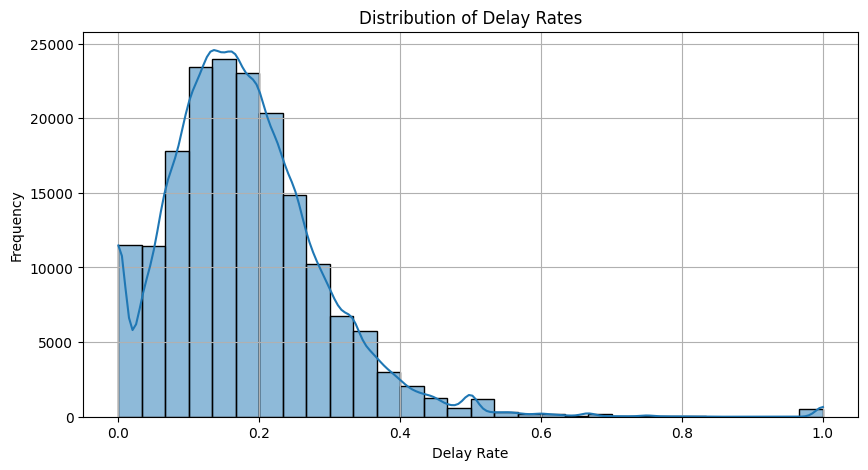

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['delay_rate'], bins=30, kde=True)
plt.title("Distribution of Delay Rates")
plt.xlabel("Delay Rate")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [41]:
df['is_delayed'] = (df['delay_rate'] > 0.2).astype(int)

In [42]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct_x', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'carrier_airport_delay_score',
       'weather_month', 'security_ct_y', 'carrier_label', 'airport_label',
       'delay_rate', 'is_delayed'],
      dtype='object')

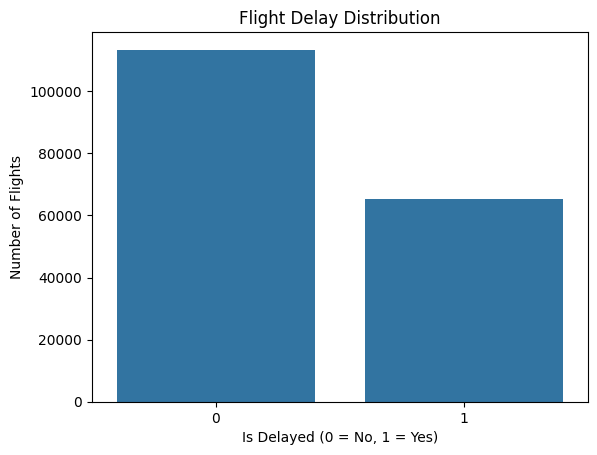

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='is_delayed')
plt.xlabel("Is Delayed (0 = No, 1 = Yes)")
plt.ylabel("Number of Flights")
plt.title("Flight Delay Distribution")
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns=['year', 'carrier','airport_name','arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay','carrier_name','airport','arr_del15','is_delayed','arr_cancelled','arr_diverted','arr_flights','delay_rate'])  # keep delay time for later
y = df['is_delayed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
X.columns.tolist()

['month',
 'carrier_ct',
 'weather_ct',
 'nas_ct',
 'security_ct_x',
 'late_aircraft_ct',
 'carrier_airport_delay_score',
 'weather_month',
 'security_ct_y',
 'carrier_label',
 'airport_label']

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred=clf.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred))

# Recall
print("Recall:", recall_score(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8148251748251748
Precision: 0.7929751316028317
Recall: 0.6681706944019578
F1 Score: 0.7252427990371046
Confusion Matrix:
 [[20393  2281]
 [ 4339  8737]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86     22674
           1       0.79      0.67      0.73     13076

    accuracy                           0.81     35750
   macro avg       0.81      0.78      0.79     35750
weighted avg       0.81      0.81      0.81     35750



In [47]:
from xgboost import XGBClassifier

neg, pos = y_train.value_counts()
scale = neg / pos

clf = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

clf.fit(X_train, y_train)


d:\socbiz\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:09:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred=clf.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred))

# Recall
print("Recall:", recall_score(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8045874125874126
Precision: 0.7069176406632237
Recall: 0.795579687977975
F1 Score: 0.7486327000575705
Confusion Matrix:
 [[18361  4313]
 [ 2673 10403]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84     22674
           1       0.71      0.80      0.75     13076

    accuracy                           0.80     35750
   macro avg       0.79      0.80      0.79     35750
weighted avg       0.81      0.80      0.81     35750



In [49]:
clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale,
    use_label_encoder=False,
    random_state=42
)
clf.fit(X_train, y_train)

d:\socbiz\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:09:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred=clf.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred))

# Recall
print("Recall:", recall_score(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8111048951048951
Precision: 0.7183808800165781
Recall: 0.7953502600183542
F1 Score: 0.7549087213733532
Confusion Matrix:
 [[18597  4077]
 [ 2676 10400]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85     22674
           1       0.72      0.80      0.75     13076

    accuracy                           0.81     35750
   macro avg       0.80      0.81      0.80     35750
weighted avg       0.82      0.81      0.81     35750



Predicting just the delays

In [51]:
df_delayed = df[df['is_delayed'] == 1].copy()

In [52]:
df_delayed.isna().any()

year                           False
month                          False
carrier                        False
carrier_name                   False
airport                        False
airport_name                   False
arr_flights                    False
arr_del15                      False
carrier_ct                     False
weather_ct                     False
nas_ct                         False
security_ct_x                  False
late_aircraft_ct               False
arr_cancelled                  False
arr_diverted                   False
arr_delay                      False
carrier_delay                  False
weather_delay                  False
nas_delay                      False
security_delay                 False
late_aircraft_delay            False
carrier_airport_delay_score    False
weather_month                  False
security_ct_y                  False
carrier_label                  False
airport_label                  False
delay_rate                     False
i

In [53]:
df_delayed['avg_arr_delay'] = df_delayed['arr_delay'] / df_delayed['arr_flights']

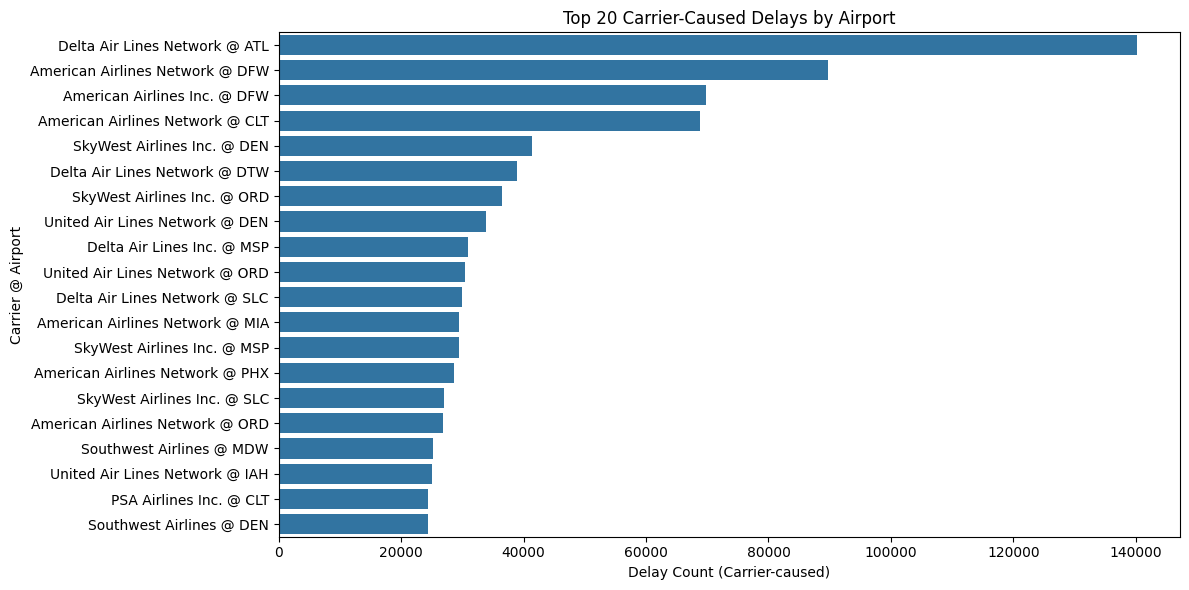

In [54]:
grouped = df_delayed.groupby(['carrier_name', 'airport'])['carrier_delay'].mean().reset_index()

top_delays = grouped.sort_values(by='carrier_delay', ascending=False).head(20)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_delays, x='carrier_delay', y=top_delays['carrier_name'] + " @ " + top_delays['airport'])
plt.xlabel("Delay Count (Carrier-caused)")
plt.ylabel("Carrier @ Airport")
plt.title("Top 20 Carrier-Caused Delays by Airport")
plt.tight_layout()
plt.show()

In [55]:
df_delayed.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct_x', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'carrier_airport_delay_score',
       'weather_month', 'security_ct_y', 'carrier_label', 'airport_label',
       'delay_rate', 'is_delayed', 'avg_arr_delay'],
      dtype='object')

In [56]:
X = df_delayed.drop(columns=['year', 'carrier','airport_name','arr_delay','carrier_name','airport','arr_del15','is_delayed','arr_cancelled','arr_diverted','arr_flights','delay_rate','avg_arr_delay'])  # keep delay time for later
y = df_delayed['avg_arr_delay']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [58]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae:.2f} minutes")
print(f"RMSE: {rmse:.2f} minutes")

MAE: 4.69 minutes
RMSE: 135.47 minutes


In [59]:
from xgboost import XGBRegressor
reg = XGBRegressor(
    tree_method="hist",
    eval_metric=mean_absolute_error,
)
reg.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:14.68816	validation_0-mean_absolute_error:7.41079
[1]	validation_0-rmse:14.71682	validation_0-mean_absolute_error:7.07510
[2]	validation_0-rmse:14.47004	validation_0-mean_absolute_error:6.80851
[3]	validation_0-rmse:14.34966	validation_0-mean_absolute_error:6.58030
[4]	validation_0-rmse:14.73790	validation_0-mean_absolute_error:6.39794
[5]	validation_0-rmse:14.50653	validation_0-mean_absolute_error:6.21932
[6]	validation_0-rmse:14.38661	validation_0-mean_absolute_error:6.07511
[7]	validation_0-rmse:14.45254	validation_0-mean_absolute_error:5.91824
[8]	validation_0-rmse:14.31634	validation_0-mean_absolute_error:5.80713
[9]	validation_0-rmse:14.24793	validation_0-mean_absolute_error:5.66554
[10]	validation_0-rmse:14.23846	validation_0-mean_absolute_error:5.56396
[11]	validation_0-rmse:14.11610	validation_0-mean_absolute_error:5.48426
[12]	validation_0-rmse:14.07362	validation_0-mean_absolute_error:5.40494
[13]	validation_0-rmse:14.12313	validation_0-mean_absolute_er

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,<function mea...001483F5D5B20>


In [60]:
df_delayed['OAI'] = (
    df_delayed['carrier_delay'] * 2.0 +
    df_delayed['late_aircraft_delay'] * 2.0 +
    df_delayed['nas_delay'] * 1.5 +
    df_delayed['weather_delay'] * 1.0 +
    df_delayed['security_delay'] * 0.5
)

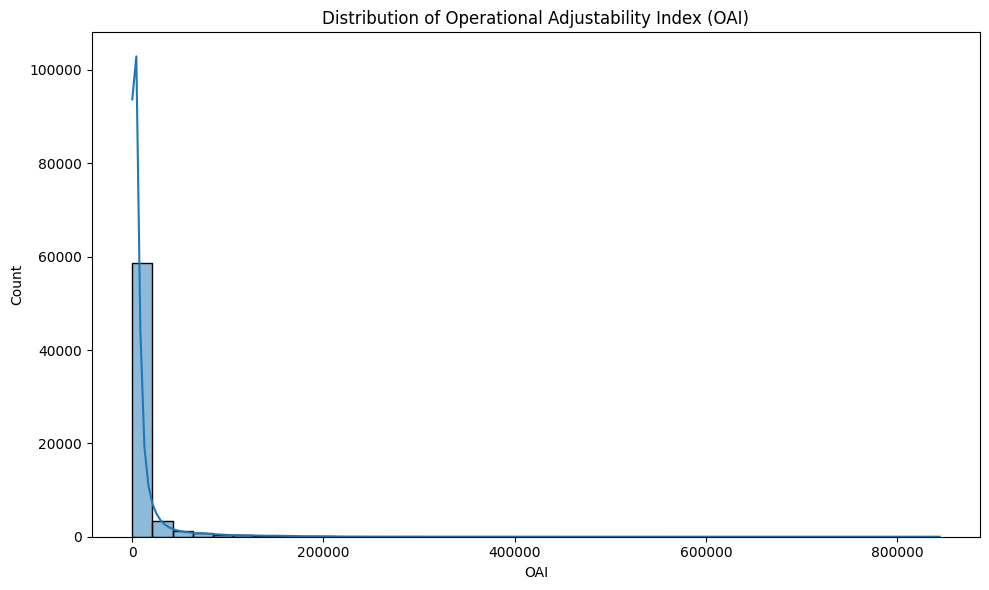

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_delayed['OAI'], bins=40, kde=True)
plt.title('Distribution of Operational Adjustability Index (OAI)')
plt.xlabel('OAI')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


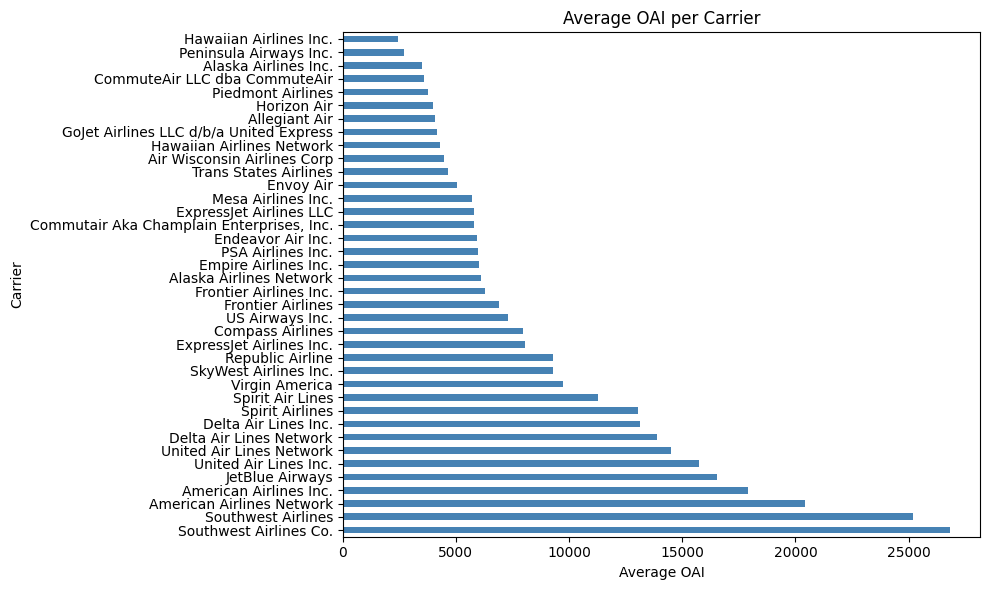

In [62]:
carrier_oai = df_delayed.groupby('carrier_name')['OAI'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
carrier_oai.plot(kind='barh', color='steelblue')
plt.title('Average OAI per Carrier')
plt.xlabel('Average OAI')
plt.ylabel('Carrier')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


features = df_delayed.drop(columns=[
    'OAI', 'arr_delay', 'carrier_delay', 'late_aircraft_delay',
    'nas_delay', 'weather_delay', 'security_delay',
    'year', 'carrier', 'airport_name', 'carrier_name', 'airport',
    'arr_del15', 'is_delayed'
])
target = df_delayed['OAI']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, preds))
print("R²:", r2_score(y_test, preds))


MAE: 330.9379337768602
R²: 0.9963943404683802


: 

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

d:\socbiz\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# what all do I plan to try: hypothesis testing+EDA+A/B testing